### Quantification model schematic

Creating sub-panels for the schematic in figure S1 of the paper

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('../../..')
from src import error_func, gaus, interp_1d_array
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

if not os.path.exists('Figs'):
    os.mkdir('Figs')

In [2]:
sigma = 2
x = np.arange(0, 50)
cytbg = (error_func(x, 25, sigma * np.sqrt(2)) + 1) / 2
membg = gaus(x, 25, sigma)

### Figure: membrane signal profile

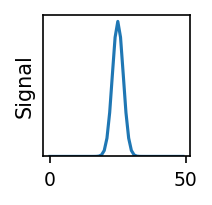

In [3]:
fig, ax = plt.subplots()
ax.plot(membg)
ax.set_ylabel("Signal")
ax.set_yticks([])
ax.set_xticks([0, 50])
ax.tick_params(axis="both", labelsize=9)
fig.set_size_inches(1.5, 1.5)
ax.set_ylim(bottom=0)
fig.subplots_adjust(left=0.25, bottom=0.25)
fig.savefig("Figs/membrane_signal_profile.png", dpi=600, transparent=True)

### Figure: cytoplasmic signal profile

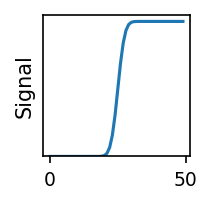

In [4]:
fig, ax = plt.subplots()
ax.plot(cytbg)
ax.set_ylabel("Signal")
ax.set_yticks([])
ax.set_xticks([0, 50])
ax.tick_params(axis="both", labelsize=9)
fig.set_size_inches(1.5, 1.5)
ax.set_ylim(bottom=0)
fig.subplots_adjust(left=0.25, bottom=0.25)
fig.savefig("Figs/cytoplasmic_signal_profile.png", dpi=600, transparent=True)

### Figure: membrane concentration

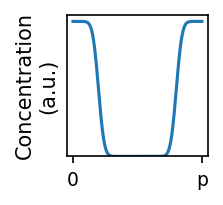

In [5]:
width = 500
x = np.arange(0, 400)
mems = (error_func(x, 320, 20) + error_func(x, 320, 20)[::-1] + 2) / 2
mems = (interp_1d_array(mems, width) / max(mems)) * 3

fig, ax = plt.subplots()
ax.plot(mems)
ax.set_ylabel("Concentration\n(a.u.)")
ax.set_xticks([0, width])
ax.set_xticklabels(["0", "p"])
ax.set_yticks([])
ax.set_ylim(bottom=0)
ax.tick_params(axis="both", labelsize=9)
fig.set_size_inches(1.5, 1.5)
ax.set_ylim(bottom=0)
fig.subplots_adjust(left=0.27, bottom=0.25)
fig.savefig("Figs/membrane_concentration_profile.png", dpi=600, transparent=True)

### Figure: cytoplasmic concentration

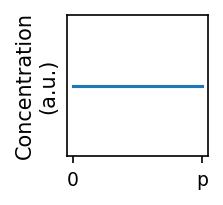

In [6]:
cyts = np.ones(width) * 1

fig, ax = plt.subplots()
ax.plot(cyts)
ax.set_ylabel("Concentration\n(a.u.)")
ax.set_xticks([0, width])
ax.set_xticklabels(["0", "p"])
ax.set_yticks([])
ax.set_ylim(0, cyts[0] * 2)
ax.tick_params(axis="both", labelsize=9)
fig.set_size_inches(1.5, 1.5)
ax.set_ylim(bottom=0)
fig.subplots_adjust(left=0.27, bottom=0.25)
fig.savefig("Figs/cytoplasmic_concentration_profile.png", dpi=600, transparent=True)

### Figure: cytoplasmic component

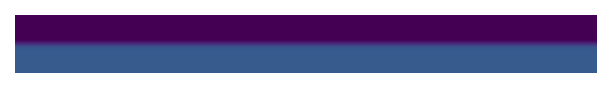

In [7]:
vmax = 3.5

fig, ax = plt.subplots()
cyt_sim = np.expand_dims(cytbg, -1) * np.expand_dims(cyts, 0)
ax.imshow(cyt_sim, vmin=0, vmax=vmax, cmap="viridis")
ax.axis("off")
fig.set_size_inches(5, 1)
fig.savefig("Figs/cytoplasmic_signal_image.png", dpi=600, transparent=True)

### Figure: membrane component

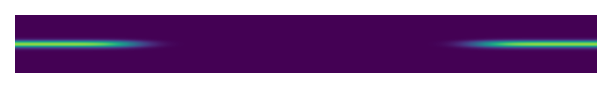

In [8]:
fig, ax = plt.subplots()
mem_sim = np.expand_dims(membg, -1) * np.expand_dims(mems, 0)
ax.imshow(mem_sim, vmin=0, vmax=vmax, cmap="viridis")
ax.axis("off")
fig.set_size_inches(5, 1)
fig.savefig("Figs/membrane_signal_image.png", dpi=600, transparent=True)

### Figure: total simulation

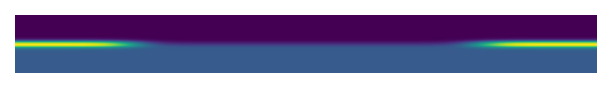

In [9]:
fig, ax = plt.subplots()
ax.imshow(mem_sim + cyt_sim, vmin=0, vmax=vmax, cmap="viridis")
ax.axis("off")
fig.set_size_inches(5, 1)
fig.savefig("Figs/simulated_image.png", dpi=600, transparent=True)